# Fine-tuning SpeechT5 for multilingual TTS

In [ ]:
!pip install datasets soundfile speechbrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.0/519.0 kB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.6/109.6 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 43.3 MB/s eta 0:00:00


In [ ]:
!pip install git+https://github.com/huggingface/transformers.git

  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-hlvhgftm
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-hlvhgftm
  Resolved https://github.com/huggingface/transformers.git to commit 5bb4430edc7df9f9950d412d98bbe505cc4d328b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 72.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.9 MB/s eta 0:00:00
  Created wheel for transformers: filename=transformers-4.31.0.dev0-py3-none-any.whl size=7352645 sha256=7129ec995398bb0d5bb7a2ecc5bbe3390d080f1fdd837e2498c6b34622a744af
  Stored in directory: /tmp/pip-ephem-wheel-cache-ht8nwwlh/wheels/e7/9c/5b/e1a9c8007c343041e61cc484433d512ea9274272e3fcbe7c16
Successfully built transformers


In [ ]:
!pip install --upgrade accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 10.7 MB/s eta 0:00:00


## Load the model

We'll start from SpeechT5 that's already been fine-tuned for English TTS, and fine-tune it again but for a new language. For more info about the original checkpoint, you can find its model card on the [Hugging Face Hub](https://huggingface.co/microsoft/speecht5_tts).

In [ ]:
from transformers import SpeechT5Processor, SpeechT5ForTextToSpeech

processor = SpeechT5Processor.from_pretrained("microsoft/speecht5_tts")
model = SpeechT5ForTextToSpeech.from_pretrained("microsoft/speecht5_tts")

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
from datasets import load_dataset, Audio

dataset = load_dataset(
    "mozilla-foundation/common_voice_13_0", "ur", split="train"
)


Extracting data files:   0%|          | 0/5 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/5 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]


Reading metadata...: 4129it [00:00, 73096.36it/s]


Generating validation split: 0 examples [00:00, ? examples/s]


Reading metadata...: 3302it [00:00, 68153.42it/s]


Generating test split: 0 examples [00:00, ? examples/s]


Reading metadata...: 3304it [00:00, 69193.72it/s]


Generating other split: 0 examples [00:00, ? examples/s]


Reading metadata...: 0it [00:00, ?it/s]
Reading metadata...: 9066it [00:00, 90647.77it/s]
Reading metadata...: 20272it [00:00, 103236.62it/s]
Reading metadata...: 31450it [00:00, 107134.60it/s]
Reading metadata...: 42164it [00:00, 102921.86it/s]
Reading metadata...: 52502it [00:00, 103080.55it/s]
Reading metadata...: 63552it [00:00, 105556.55it/s]
Reading metadata...: 74174it [00:00, 105767.15it/s]
Reading metadata...: 85366it [00:00, 102153.96it/s]


Generating invalidated split: 0 examples [00:00, ? examples/s]


Reading metadata...: 3312it [00:00, 52174.19it/s]


Dataset common_voice_13_0 downloaded and prepared to /root/.cache/huggingface/datasets/mozilla-foundation___common_voice_13_0/ur/13.0.0/2506e9a8950f5807ceae08c2920e814222909fd7f477b74f5d225802e9f04055. Subsequent calls will reuse this data.


In [ ]:
dataset

Dataset({
    features: ['client_id', 'path', 'audio', 'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'locale', 'segment', 'variant'],
    num_rows: 4129
})

It's important to set the sampling rate of the audio data to 16 kHz, which is what SpeechT5 expects.

In [ ]:
dataset = dataset.cast_column("audio", Audio(sampling_rate=16000))

Transliteration Urdu to Roman Urdu

In [ ]:
buck2uni = {
            u"\u0627":"A",
            u"\u0627":"A",
            u"\u0675":"A",
            u"\u0673":"A",
            u"\u0630":"A",
            u"\u0622":"AA",
            u"\u0628":"B",
            u"\u067E":"P",
            u"\u062A":"T",
            u"\u0637":"T",
            u"\u0679":"T",
            u"\u062C":"J",
            u"\u0633":"S",
            u"\u062B":"S",
            u"\u0635":"S",
            u"\u0686":"CH",
            u"\u062D":"H",
            u"\u0647":"H",
            u"\u0629":"H",
            u"\u06DF":"H",
            u"\u062E":"KH",
            u"\u062F":"D",
            u"\u0688":"D",
            u"\u0630":"Z",
            u"\u0632":"Z",
            u"\u0636":"Z",
            u"\u0638":"Z",
            u"\u068E":"Z",
            u"\u0631":"R",
            u"\u0691":"R",
            u"\u0634":"SH",
            u"\u063A":"GH",
            u"\u0641":"F",
            u"\u06A9":"K",
            u"\u0642":"K",
            u"\u06AF":"G",
            u"\u0644":"L",
            u"\u0645":"M",
            u"\u0646":"N",
            u"\u06BA":"N",
            u"\u0648":"O",
            u"\u0649":"Y",
            u"\u0626":"Y",
            u"\u06CC":"Y",
            u"\u06D2":"E",
            u"\u06C1":"H",
            u"\u064A":"E"  ,
            u"\u06C2":"AH"  ,
            u"\u06BE":"H"  ,
            u"\u0639":"A"  ,
            u"\u0643":"K" ,
            u"\u0621":"A",
            u"\u0624":"O",
            u"\u060C":"" #seperator ulta comma
}
def transString(string, reverse=0):
    '''Given a Unicode string, transliterate into Buckwalter. To go from
    Buckwalter back to Unicode, set reverse=1'''
    for k, v in buck2uni.items():
      if not reverse:
            string = string.replace(k, v)
      else:
            string = string.replace(v, k)
    return string
print(dataset[2]["sentence"])
print(transString(dataset[2]["sentence"]))

یہ فیصلہ بھی گزشتہ دو سال میں
YH FYSLH BHY GZSHTH DO SAL MYN


In [ ]:
tokenizer = processor.tokenizer

In [ ]:
def extract_all_chars(batch):
    all_text = " ".join(batch["sentence"])
    vocab = list(set(all_text))
    return {"vocab": [vocab], "all_text": [all_text]}

vocabs = dataset.map(
    extract_all_chars,
    batched=True,
    batch_size=-1,
    keep_in_memory=True,
    remove_columns=dataset.column_names,
)

dataset_vocab = set(vocabs["vocab"][0])
tokenizer_vocab = {k for k,_ in tokenizer.get_vocab().items()}

Map:   0%|          | 0/4129 [00:00<?, ? examples/s]

Now we have two sets of characters, one with the vocabulary from the dataset and one with the vocabulary from the tokenizer. By taking the difference between these sets, we find the characters that are in the dataset but not in the tokenizer.

In [ ]:
dataset_vocab - tokenizer_vocab

{' ',
 '،',
 'ؓ',
 'ؔ',
 '؛',
 '؟',
 'ء',
 'آ',
 'أ',
 'ؤ',
 'ئ',
 'ا',
 'ب',
 'ت',
 'ث',
 'ج',
 'ح',
 'خ',
 'د',
 'ذ',
 'ر',
 'ز',
 'س',
 'ش',
 'ص',
 'ض',
 'ط',
 'ظ',
 'ع',
 'غ',
 'ف',
 'ق',
 'ك',
 'ل',
 'م',
 'ن',
 'ه',
 'و',
 'ي',
 'ً',
 'َ',
 'ُ',
 'ِ',
 'ّ',
 'ْ',
 'ٓ',
 'ٔ',
 'ٰ',
 'ٹ',
 'پ',
 'چ',
 'ڈ',
 'ڑ',
 'ژ',
 'ک',
 'گ',
 'ں',
 'ھ',
 'ہ',
 'ۂ',
 'ۃ',
 'ی',
 'ے',
 'ۓ',
 '۔',
 '‘',
 '’',
 '“',
 '”',
 '…',
 'ﭨ',
 'ﮭ',
 'ﮯ',
 'ﯾ',
 'ﷲ',
 'ﷺ',
 'ﺗ',
 'ﺘ',
 'ﺩ',
 'ﺲ',
 'ﻧ',
 'ﻮ'}

Next, we will define a function to map these characters to valid tokens and then run it on the dataset. No need to handle space, that's already replaced by `▁` in the tokenizer.

In [ ]:
replacements = [
  (' ', ' '),
  ('،', ','),
  ('ؓ', ''),
  ('ؔ', ''),
  ('؛', ';'),
  ('؟', '?'),
  ('ء', ''),
  ('آ', 'aa'),
  ('أ', 'aa'),
  ('ؤ', ''),
  ('ئ', ''),
  ('ا', 'aa'),
  ('ب', 'b'),
  ('ت', 't'),
  ('ث', 's'),
  ('ج', 'j'),
  ('ح', 'h'),
  ('خ', 'kh'),
  ('د', 'd'),
  ('ذ', 'z'),
  ('ر', 'r'),
  ('ز', 'z'),
  ('س', 's'),
  ('ش', 'sh'),
  ('ص', 's'),
  ('ض', 'd'),
  ('ط', 't'),
  ('ظ', 'z'),
  ('ع', "'"),
  ('غ', 'gh'),
  ('ف', 'f'),
  ('ق', 'q'),
  ('ك', 'k'),
  ('ل', 'l'),
  ('م', 'm'),
  ('ن', 'n'),
  ('ه', 'h'),
  ('و', 'w'),
  ('ي', 'y'),
  ('ً', 'an'),
  ('َ', 'a'),
  ('ُ', 'u'),
  ('ِ', 'i'),
  ('ّ', ''),
  ('ْ', ''),
  ('ٓ', ''),
  ('ٔ', ''),
  ('ٰ', ''),
  ('ٹ', 't'),
  ('پ', 'p'),
  ('چ', 'ch'),
  ('ڈ', 'd'),
  ('ڑ', 'r'),
  ('ژ', 'zh'),
  ('ک', 'k'),
  ('گ', 'g'),
  ('ں', 'n'),
  ('ھ', 'h'),
  ('ہ', 'h'),
  ('ۂ', 'h'),
  ('ۃ', 't'),
  ('ی', 'y'),
  ('ے', 'e'),
  ('ۓ', 'e'),
  ('۔', '.'),
  ('‘', "'"),
  ('’', "'"),
  ('“', '"'),
  ('”', '"'),
  ('…', '...'),
  ('ﭨ', ''),
  ('ﮭ', ''),
  ('ﮯ', ''),
  ('ﯾ', ''),
  ('ﷲ', 'Allah'),
  ('ﷺ', 'Sallallahu alayhi wa sallam'),
  ('ﺗ', 't'),
  ('ﺘ', 't'),
  ('ﺩ', 'd'),
  ('ﺲ', 's'),
  ('ﻧ', 'n'),
  ('ﻮ', 'w')
]

def cleanup_text(inputs):
    for src, dst in replacements:
        inputs["sentence"] = inputs["sentence"].replace(src, dst)
    return inputs

dataset = dataset.map(cleanup_text)

Map:   0%|          | 0/4129 [00:00<?, ? examples/s]

## Speaker embeddings

To allow the TTS model to distinguish between multiple speakers, we'll need to create a speaker embedding for each example. The speaker embedding is simply an additional input into the model that captures a particular speaker's voice characteristics.

To create the speaker embeddings, we use the [spkrec-xvect-voxceleb](https://huggingface.co/speechbrain/spkrec-xvect-voxceleb) model from SpeechBrain. The following defines a function `create_speaker_embedding()` that takes an input audio waveform and outputs a 512-element vector containing the corresponding speaker embedding.

In [ ]:
import os
import torch
from speechbrain.pretrained import EncoderClassifier

spk_model_name = "speechbrain/spkrec-xvect-voxceleb"

device = "cpu"
speaker_model = EncoderClassifier.from_hparams(
    source=spk_model_name,
    run_opts={"device": device},
    savedir=os.path.join("/tmp", spk_model_name)
)

def create_speaker_embedding(waveform):
    with torch.no_grad():
        speaker_embeddings = speaker_model.encode_batch(torch.tensor(waveform))
        speaker_embeddings = torch.nn.functional.normalize(speaker_embeddings, dim=2)
        speaker_embeddings = speaker_embeddings.squeeze().cpu().numpy()
    return speaker_embeddings

Note: the `speechbrain/spkrec-xvect-voxceleb` model was trained on English speech from the VoxCeleb dataset, while our training examples are in Urdu. We're assuming here that this model will still make reasonable speaker embeddings, but this may not be true. First training an X-vector model on the target speech, such as Urdu, might work better.

## Preparing the dataset

The `prepare_dataset` function takes in a single example and uses the `SpeechT5Processor` object to tokenize the input text and load the target audio into a log-mel spectrogram. It also adds the speaker embeddings as an additional input.

In [ ]:
def prepare_dataset(example):
    # load the audio data; if necessary, this resamples the audio to 16kHz
    audio = example["audio"]

    # feature extraction and tokenization
    example = processor(
        text=example["sentence"],
        audio_target=audio["array"],
        sampling_rate=audio["sampling_rate"],
        return_attention_mask=False,
    )

    # strip off the batch dimension
    example["labels"] = example["labels"][0]

    # use SpeechBrain to obtain x-vector
    example["speaker_embeddings"] = create_speaker_embedding(audio["array"])

    return example

Let's verify the processing is correct by looking at a single example:

In [ ]:
processed_example = prepare_dataset(dataset[0])

This should give us:

- the tokens for the input text in `input_ids`
- the speaker embedding in `speaker_embeddings`
- the target spectrogram in `labels`

In [ ]:
list(processed_example.keys())

['input_ids', 'labels', 'speaker_embeddings']

The tokens should decode into the original text, with `</s>` to mark the end of the sentence.

In [ ]:
tokenizer.decode(processed_example["input_ids"])

'kbhy kbhaar hy khyaaly plaaw bnaataa hwn</s>'

Speaker embeddings should be a 512-element vector:

In [ ]:
processed_example["speaker_embeddings"].shape

(512,)

The labels should be a log-mel spectrogram with 80 mel bins.

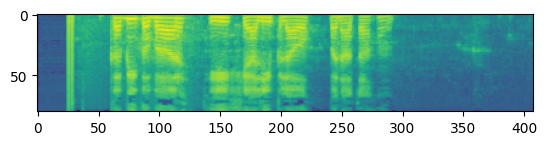

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(processed_example["labels"].T)
plt.show()

If we run a vocoder on the log-mel spectrogram, it should produce the original audio again. We'll load the HiFi-GAN vocoder from the original [SpeechT5 checkpoint](https://hf.co/microsoft/speecht5_hifigan).

In [ ]:
from transformers import SpeechT5HifiGan
vocoder = SpeechT5HifiGan.from_pretrained("microsoft/speecht5_hifigan")

In [ ]:
spectrogram = torch.tensor(processed_example["labels"])
with torch.no_grad():
    speech = vocoder(spectrogram)

In [ ]:
from IPython.display import Audio
Audio(speech.cpu().numpy(), rate=16000)

That all looks and sounds good! We can now process the entire dataset. This will take between 5 and 10 minutes.

In [ ]:
dataset = dataset.map(
    prepare_dataset, remove_columns=dataset.column_names,
)

Map:   0%|          | 0/4129 [00:00<?, ? examples/s]

Some of the examples in the dataset are apparently longer than the maximum input length the model can handle (600 tokens), so we should remove those from the dataset. In fact, to allow for larger batch sizes we'll remove anything over 200 tokens.

In [ ]:
def is_not_too_long(input_ids):
    input_length = len(input_ids)
    return input_length < 200

dataset = dataset.filter(is_not_too_long, input_columns=["input_ids"])

Filter:   0%|          | 0/4129 [00:00<?, ? examples/s]

How many examples are left?

In [ ]:
len(dataset)

4129

## Train/test split

Create a basic train/test split. For our purposes, it's OK if the same speaker is part of both sets.

In [ ]:
dataset = dataset.train_test_split(test_size=0.1)

What does the dataset look like now?

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'labels', 'speaker_embeddings'],
        num_rows: 3716
    })
    test: Dataset({
        features: ['input_ids', 'labels', 'speaker_embeddings'],
        num_rows: 413
    })
})

## Collator to make batches

We need to define a custom collator to combine multiple examples into a batch. This will pad shorter sequences with padding tokens. For the spectrogram labels, the padded portions are replaced with the special value -100. This special value tells the model to ignore that part of the spectrogram when calculating the spectrogram loss.


In [ ]:
from dataclasses import dataclass
from typing import Any, Dict, List, Union

@dataclass
class TTSDataCollatorWithPadding:
    processor: Any

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:

        input_ids = [{"input_ids": feature["input_ids"]} for feature in features]
        label_features = [{"input_values": feature["labels"]} for feature in features]
        speaker_features = [feature["speaker_embeddings"] for feature in features]

        # collate the inputs and targets into a batch
        batch = processor.pad(
            input_ids=input_ids,
            labels=label_features,
            return_tensors="pt",
        )

        # replace padding with -100 to ignore loss correctly
        batch["labels"] = batch["labels"].masked_fill(
            batch.decoder_attention_mask.unsqueeze(-1).ne(1), -100
        )

        # not used during fine-tuning
        del batch["decoder_attention_mask"]

        # round down target lengths to multiple of reduction factor
        if model.config.reduction_factor > 1:
            target_lengths = torch.tensor([
                len(feature["input_values"]) for feature in label_features
            ])
            target_lengths = target_lengths.new([
                length - length % model.config.reduction_factor for length in target_lengths
            ])
            max_length = max(target_lengths)
            batch["labels"] = batch["labels"][:, :max_length]

        # also add in the speaker embeddings
        batch["speaker_embeddings"] = torch.tensor(speaker_features)

        return batch

In SpeechT5, the input to the decoder part of the model is reduced by a factor 2. In other words, it throws away every other timestep from the target sequence. The decoder then predicts a sequence that is twice as long. Since the original target sequence length may be odd, the data collator makes sure to round the maximum length of the batch down to be a multiple of 2.

In [ ]:
data_collator = TTSDataCollatorWithPadding(processor=processor)

Let's test the data collator.

In [ ]:
features = [
    dataset["train"][0],
    dataset["train"][1],
    dataset["train"][20],
]

batch = data_collator(features)

In [ ]:
{k:v.shape for k,v in batch.items()}

{'input_ids': torch.Size([3, 80]),
 'attention_mask': torch.Size([3, 80]),
 'labels': torch.Size([3, 446, 80]),
 'speaker_embeddings': torch.Size([3, 512])}

Looks good!

## Training

It's always a good idea to upload model checkpoints directly to the [Hugging Face Hub](https://huggingface.co/) while training. To allow this, first log in to the Hub by entering your Hub authentication token:

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

The `use_cache=True` option is incompatible with gradient checkpointing. Disable it for training, otherwise it keeps complaining about it.

In [ ]:
model.config.use_cache = False

Define the training arguments.

We won't be computing any evaluation metrics during the training process. Instead, we'll only look at the loss. The lower the loss, the better the model.

Note: If you do not want to upload the model checkpoints to the Hub, set `push_to_hub=False`.

In [ ]:
from transformers import Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    output_dir="./speecht5_tts_commonvoice_ur",  # change to a repo name of your choice
    per_device_train_batch_size=16,
    gradient_accumulation_steps=2,
    learning_rate=1e-5,
    warmup_steps=500,
    max_steps=4000,
    gradient_checkpointing=True,
    # fp16=True,
    evaluation_strategy="steps",
    per_device_eval_batch_size=8,
    save_steps=1000,
    eval_steps=1000,
    logging_steps=25,
    report_to=["tensorboard"],
    load_best_model_at_end=True,
    greater_is_better=False,
    label_names=["labels"],
    push_to_hub=True,
)

Create the trainer object using the model, dataset, and data collator.

In [ ]:
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    args=training_args,
    model=model,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    data_collator=data_collator,
    tokenizer=processor.tokenizer,
)

Cloning https://huggingface.co/ZainabShah02/speecht5_tts_commonvoice_ur into local empty directory.


And with that, we're ready to start training!
It is possible that you will encounter a CUDA "out-of-memory" error when you start training. In this case, you can reduce the `per_device_train_batch_size` incrementally by factors of 2 and increase `gradient_accumulation_steps` by 2x to compensate.

In [ ]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss


Step,Training Loss,Validation Loss


KeyboardInterrupt: ignored

If we do one more `push_to_hub()` after training we can get a nice model card built for us. We simply have to set the appropriate keyword arguments (kwargs). You can change these values to match your dataset, language and model name accordingly:

In [ ]:
kwargs = {
    "dataset_tags": "mozilla-foundation/common_voice_13_0",
    "dataset": "common_voice_13_0",  # a 'pretty' name for the training dataset
    "dataset_args": "config: ur, split: train",
    "language": "ur",
    "model_name": "SpeechT5 TTS Urdu",  # a 'pretty' name for your model
    "finetuned_from": "microsoft/speecht5_tts",
    "tasks": "text-to-speech",
    "tags": "",
}

The training results can now be uploaded to the Hub. To do so, execute the `push_to_hub` command:

In [ ]:
trainer.push_to_hub(**kwargs)

Upload file pytorch_model.bin:   0%|          | 1.00/551M [00:00<?, ?B/s]

Upload file runs/Jul17_01-45-33_9c0d85bce81c/events.out.tfevents.1689558348.9c0d85bce81c.157.0:   0%|         …

Upload file spm_char.model:   0%|          | 1.00/233k [00:00<?, ?B/s]

Upload file training_args.bin:   0%|          | 1.00/4.06k [00:00<?, ?B/s]

To https://huggingface.co/ZainabShah02/speecht5_tts_commonvoice_ur
   c87b0d9..2b9510d  main -> main

   c87b0d9..2b9510d  main -> main

remote: -------------------------------------------------------------------------        
remote: Sorry, your push was rejected during YAML metadata verification:         
remote: - Error: "tags[0]" is not allowed to be empty        
remote: -------------------------------------------------------------------------        
remote: -------------------------------------------------------------------------        
remote: Please find the documentation at:        
remote: https://huggingface.co/docs/hub/model-cards#model-card-metadata        
remote:         
remote: -------------------------------------------------------------------------        
To https://huggingface.co/ZainabShah02/speecht5_tts_commonvoice_ur
 ! [remote rejected] main -> main (pre-receive hook declined)
error: failed to push some refs to 'https://user:hf_jKnGnOZkRpPtDSECKNtlPtHbYkBLqaN

'https://huggingface.co/ZainabShah02/speecht5_tts_commonvoice_ur/commit/2b9510dbeb4b19badc854a9af68056af1f351a55'

You can now share this model with anyone using the link on the Hub.

## Evaluate

After training finishes, let's use the model to synthesize some speech!

I'm loading the model from the Hugging Face Hub, as the Colab notebook was terminated before training finished (which is why it's a good idea to use `push_to_hub=True` when training).

In [ ]:
model = SpeechT5ForTextToSpeech.from_pretrained("ZainabShah02/speecht5_tts_commonvoice_ur")

First we need to obtain a speaker embedding. We can simply grab one from the test set.

In [ ]:
example = dataset["test"][304]
speaker_embeddings = torch.tensor(example["speaker_embeddings"]).unsqueeze(0)
speaker_embeddings.shape

torch.Size([1, 512])

Define some input text and tokenize it.

In [ ]:
text = "Aapka kia haal hay"

In [ ]:
#tokenizer.decode(tokenizer(text)["input_ids"])

In [ ]:
inputs = processor(text=text, return_tensors="pt")

Tell the model to generate a spectrogram from the input text.

In [ ]:
spectrogram = model.generate_speech(inputs["input_ids"], speaker_embeddings)

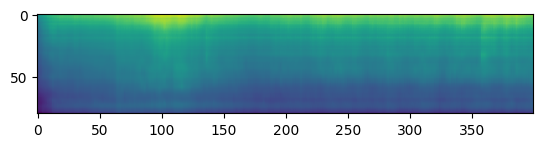

In [ ]:
plt.figure()
plt.imshow(spectrogram.T)
plt.show()

Finally, use the vocoder to turn the spectrogram into sound.

In [ ]:
with torch.no_grad():
    speech = vocoder(spectrogram)

In [ ]:
from IPython.display import Audio
Audio(speech.numpy(), rate=16000)

In [ ]:
import soundfile as sf
sf.write("output.wav", speech.numpy(), samplerate=16000)